In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate
import math as m

C:\Users\Avshugan\AppData\Roaming\Python\Python37\site-packages\scipy\__init__.py:140: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.16.1)
  UserWarning)


In [3]:
def phi(q, xq, yq, X, Y):
    e0 = 8.85e-12
    Nq = len(q)
    Nx = len(X)
    Ny = len(Y)
    
    M = np.zeros((Nx, Ny))
    
    for i in range(Nx):
        for j in range(Ny):
            s = 0
            for k in range(Nq):
                if X[i] == xq[k] and Y[j] == yq[k]:
                    s = np.inf
                    break
                s += q[k]/((X[i] - xq[k])**2+(Y[j] - yq[k])**2)**0.5
            
            M[i, j] = s/(4*e0*m.pi)
    return M     

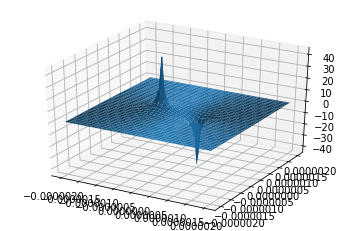

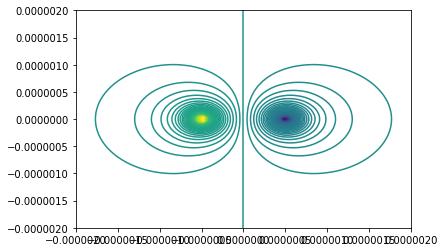

In [4]:
#потенциал диполя
e = 1.6e-16
l = 1e-6
q = [e, -e]

xq = [-l/2, l/2]
yq = np.zeros(2)

N1 = 80
x_min = -2*l
y_min = -2*l

x_max = 2*l
y_max = 2*l

x = np.linspace(x_min, x_max, N1)
y = np.linspace(y_min, y_max, N1)
 
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(y1, x1, M, linewidth=0)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, M, 200)

#plt.show()

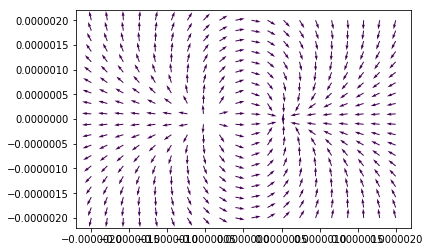

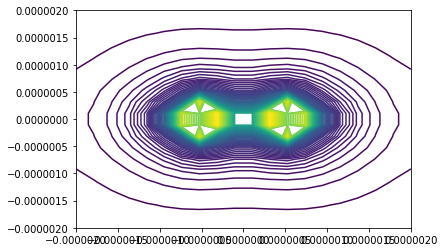

In [5]:
#напряженность диполя
e = 1.6e-16
l = 1e-6
q = [e, -e]

xq = [-l/2, l/2]
yq = np.zeros(2)

N2 = 20
x_min = -2*l
y_min = -2*l

x_max = 2*l
y_max = 2*l

x = np.linspace(x_min, x_max, N2)
y = np.linspace(y_min, y_max, N2)
 
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

px, py = np.gradient(-M, 0.1, 0.1)
px1 = px/((px**2 + py**2)**0.5)*10
py1 = py/((px**2 + py**2)**0.5)*10

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
quiv = ax3.quiver(y1, x1, px1, py1, 0.5)

mp = (px**2 + py**2)**0.5

fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
cont = ax4.contour(y1, x1, mp, 100)

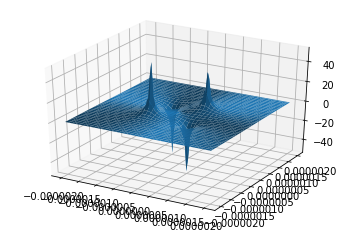

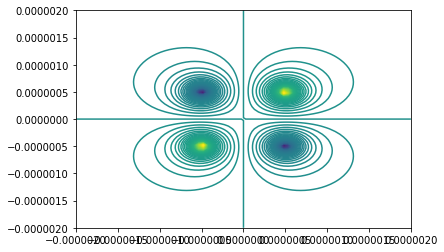

In [6]:
#потенциал квадроуполя
e = 1.6e-16
a = 1e-6
q = [e, -e, e, -e]

xq = [a/2, a/2, -a/2, -a/2]
yq = [a/2, -a/2, -a/2, a/2]

N1 = 80
x_min = -2*a
y_min = -2*a

x_max = 2*a
y_max = 2*a

x = np.linspace(x_min, x_max, N1)
y = np.linspace(y_min, y_max, N1)
 
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(y1, x1, M, linewidth=0)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, M, 200)

#plt.show()

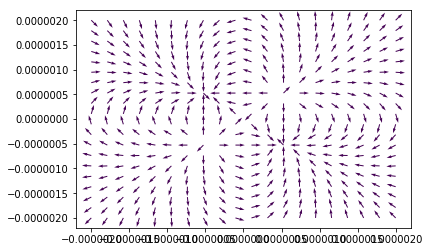

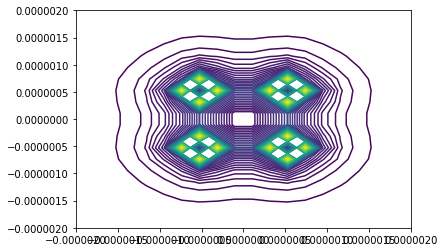

In [7]:
#напряженность квадроуполя
e = 1.6e-16
a = 1e-6
q = [e, -e, e, -e]

xq = [a/2, a/2, -a/2, -a/2]
yq = [a/2, -a/2, -a/2, a/2]

N1 = 20
x_min = -2*a
y_min = -2*a

x_max = 2*a
y_max = 2*a

x = np.linspace(x_min, x_max, N2)
y = np.linspace(y_min, y_max, N2)
 
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

px, py = np.gradient(-M, 0.1, 0.1)
px1 = px/((px**2 + py**2)**0.5)*10
py1 = py/((px**2 + py**2)**0.5)*10

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
quiv = ax3.quiver(y1, x1, px1, py1, 0.5)

mp = (px**2 + py**2)**0.5

fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
cont = ax4.contour(y1, x1, mp, 100)

Магнитное поле

In [8]:
def ring(a, y, z):
    M = np.array([0,0,1])
    Nstep = 100
    x = 0
    Ny = len(y)
    Nz = len(z)
    
    By = np.zeros((Ny, Nz), dtype=np.float64)
    Bz = np.zeros((Ny, Nz), dtype=np.float64)
    
    for i in range(Ny):
        for j in range(Nz):
            R = np.array([0, y[i], z[j]])
            B = 3 * np.dot(M, R.T) * R / (np.dot(R,R.T))**(5/2) - M / (np.dot(R,R.T))**(3/2)
            By[i][j] = B[1]
            Bz[i][j] = B[2]
    return (By, Bz)

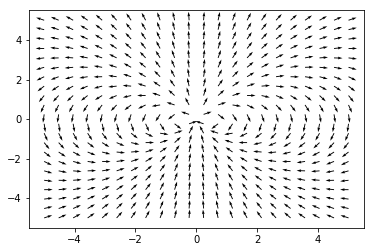

In [9]:
N1 = 21
y_min = -5
z_min = -5
y_max = 5
z_max = 5
y = []
z = []
for i in range(1, N1+2):
    y.append(y_min + (y_max - y_min)/N1 * (i-1))
    z.append(z_min + (z_max - z_min)/N1 * (i-1))
    
a = 1
By, Bz = ring(a, y, z)

mp = (By**2 + Bz**2)**0.5

by = By / mp
bz = Bz / mp

y1, z1 = np.meshgrid(y, z)

fig = plt.figure()
ax = fig.add_subplot(111)
quiv = ax.quiver(z1, y1, by, bz)

In [10]:
H = [0, 0, 1]

def lorenz_force(t, z):
    f = np.zeros(6)
    f[0] = z[1]
    f[1] = 2*m.pi*(H[2]*z[3] - H[1]*z[5])
    f[2] = z[3]
    f[3] = -2*m.pi*(H[2]*z[1] - H[0]*z[5])
    f[4] = z[5]
    f[5] = 2*m.pi*(H[1]*z[1] - H[0]*z[3])
    
    return f

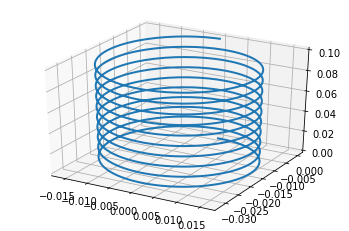

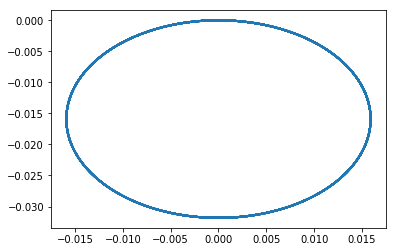

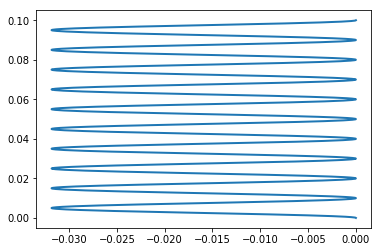

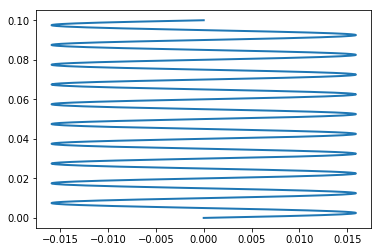

In [11]:
x0 = 0
y0 = 0
z0 = 0
vx0 = 0.1
vy0 = 0
vz0 = 0.01

t0, t1 = 0, 10
t = np.linspace(t0, t1, 1000) 
R0 = [x0, vx0, y0, vy0, z0, vz0]   
R = np.zeros((len(t), len(R0)), dtype=np.float64) 
R[0, :] = R0
r = integrate.ode(lorenz_force).set_integrator("dopri5") 
r.set_initial_value(R0, t0) 
for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) 
    if not r.successful():
        raise RuntimeError("Could not integrate")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot(R[:,0], R[:,2], R[:,4], linewidth=2)

fig = plt.figure()
ax = fig.add_subplot(111)
surf = ax.plot(R[:,0], R[:,2], linewidth=2)

fig = plt.figure()
ax = fig.add_subplot(111)
surf = ax.plot(R[:,2], R[:,4], linewidth=2)

fig = plt.figure()
ax = fig.add_subplot(111)
surf = ax.plot(R[:,0], R[:,4], linewidth=2)

In [12]:
r = (max(R[:,0]) - min(R[:,0])) / 2
print("R circle =",r)
print("T =",  2*(t[np.where(R[:,0] == min(R[:,0]))[0]] - t[np.where(R[:,0] == max(R[:,0]))[0]])[0])
print("T =",  2*m.pi*r/vx0)


R circle = 0.01591547449907247
T = 18.998998998999
T = 0.9999987552936352


ValueError: input operand has more dimensions than allowed by the axis remapping

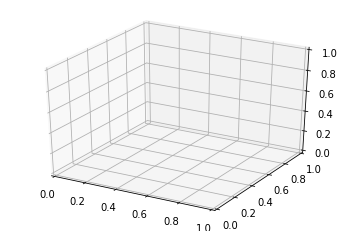

In [13]:
N = 10
lvx0 = np.linspace(0.1, 2, N)
lvz0 = np.linspace(0.1, 2, N)
h = np.zeros((N,N))

for j  in range(N):
    for k  in range(N):
        vx0 = lvx0[j]
        vz0 = lvz0[j]
        t0, t1 = 0, 10
        t = np.linspace(t0, t1, 1000) 
        R0 = [x0, vx0, y0, vy0, z0, vz0]   
        R = np.zeros((len(t), len(R0)), dtype=np.float64) 
        R[0, :] = R0
        r = integrate.ode(lorenz_force).set_integrator("dopri5") 
        r.set_initial_value(R0, t0) 
        for i in range(1, t.size):
            R[i, :] = r.integrate(t[i]) 
            if not r.successful():
                raise RuntimeError("Could not integrate")
        
        Rc = (max(R[:,0]) - min(R[:,0])) / 2
        T = 2*m.pi*Rc/vx0
        
        #print(R[:,4][np.where(t >= T)[0]])
        h[j][k] = (R[np.where(t >= T)[0],4] - R[0,4])[0]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lvx01, lvz01 = np.meshgrid(lvx0, lvz0)
surf = ax.plot(lvx01, lvz01, h, linewidth=3)